In [1]:
# Import required libraries
import matplotlib.pyplot as plt
#plt.rcParams['pdf.fonttype'] = 42
import pandas as pd
from IPython.core.display import HTML
import numpy as np
%matplotlib inline
import glob
import readData
import re


In [2]:
## Read in the data as a pandas dataframe
# Files should be .csv format in \Data\ subdirectory
# Files should be simply named SAGE_SOUTH or RIV_NORTH, without numerals
allFiles = glob.glob("Data\*.csv") #get all files with csv extension in this subfolder
print allFiles


#Return pandas dataframe with all the data, datetime index
#toggle saveCSV True/False to save a csv of the compiled data

radius = readData.readCSV(allFiles, saveCSV = False) 
radius.tail()


['Data\\RIV_NORTH.csv', 'Data\\RIV_SOUTH.csv', 'Data\\SAGE_NORTH.csv', 'Data\\SAGE_SOUTH.csv']


,Data\RIV_SOUTH.csv1,Data\RIV_SOUTH.csv2,Data\RIV_SOUTH.csv3,Data\RIV_SOUTH.csv4,Data\RIV_SOUTH.csv5,Data\RIV_SOUTH.csv6,Data\RIV_SOUTH.csv7,Data\RIV_SOUTH.csv8,Data\RIV_SOUTH.csv9,Data\SAGE_SOUTH.csv1,...,Data\SAGE_NORTH.csv9,Data\RIV_NORTH.csv1,Data\RIV_NORTH.csv2,Data\RIV_NORTH.csv3,Data\RIV_NORTH.csv4,Data\RIV_NORTH.csv5,Data\RIV_NORTH.csv6,Data\RIV_NORTH.csv7,Data\RIV_NORTH.csv8,Data\RIV_NORTH.csv9
2016-01-08 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.19,...,14.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.04,...,14.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.13,...,14.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Read in the metadata as a pandas dataframe
metadata = pd.read_csv('PISTON_DENDROMETER_METADATA.csv',sep=',', dtype=str)
# metadata.SERIAL = metadata.SERIAL.astype(str) #need to make sure again it's a string... ?
#Create dictionaries between sensor ID and metadata info
#well_id = metadata.set_index('SERIAL')['WELL ID'].to_dict()
Site = dict(zip(metadata['DSID'], metadata['Site'] )) 
Slope = dict(zip(metadata['DSID'], metadata['Slope'] )) 
# metadata.head()


In [4]:
metadata.head()

,Site,Tree #,Species,Slope,Side of Tree,Sensor ID,SE Channel Data Logger,EX Channel Data Logger,Data Logger Turn On Date,Data Logger Turn-on Time,Height Above Ground (m) (+/- 1 m),Notes,DSID,Unnamed: 13,Unnamed: 14,Unnamed: 15,Notes.1
0,Sagehorn,205,QUGA,S,NE,7,2,1,8/6/2015,18:49,3,NaN,50000,NaN,NaN,NaN,We scraped away what we interpreted to be dead...
1,Sagehorn,205,QUGA,S,SW,27,4,2,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,50001,NaN,NaN,NaN,We threaded rods approximately 15 cm in total ...
2,Sagehorn,206,QUGA,S,SW,6,1,1,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,50002,NaN,NaN,NaN,NaN
3,Sagehorn,206,QUGA,S,E,23,3,2,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,50003,NaN,NaN,NaN,NaN
4,Sagehorn,207,QUGA,S,E,43,6,3,8/6/2015,18:49,3,NaN,50004,NaN,NaN,NaN,NaN


In [5]:
#Here we assign each column name as a DSID (data stream ID)
#To do so, we need to do the following:
# 1: Figure out which Site the file is from (based on filename)
# 2: Figure out which slope the file is from (based on filename)
# 3: We now know which datalogger we have, and a subset of those columns
# 4: Finally, pair the SE Channel Data Logger (from column name) with DSID
import re
for column in radius:
    SEC = re.findall(r'\d+', column) #grab the number from the column label
    SEC = int(SEC[0])
    if 'SAGE' in column:
        if 'NORTH' in column:
            metadataSubset = metadata[(metadata.Site == 'Sagehorn') &
                                      (metadata.Slope == 'N')]
            SEChannel = dict(zip(metadataSubset['SE Channel Data Logger'], 
                                 metadataSubset['DSID'] ))  
            if str(SEC) in metadataSubset['SE Channel Data Logger'].values:
                radius.rename(columns = {column : SEChannel[str(SEC)]}, 
                              inplace=True)
            else:
                radius.rename(columns = {column : 'SAGE_NORTH_VOLTAGE'}, 
                              inplace=True)    
        else:
            metadataSubset = metadata[(metadata.Site == 'Sagehorn') &
                                      (metadata.Slope == 'S')]
            SEChannel = dict(zip(metadataSubset['SE Channel Data Logger'], 
                                 metadataSubset['DSID'] ))  
            if str(SEC) in metadataSubset['SE Channel Data Logger'].values:
                radius.rename(columns = {column : SEChannel[str(SEC)]}, 
                              inplace=True)
            else:
                radius.rename(columns = {column : 'SAGE_SOUTH_VOLTAGE'}, 
                              inplace=True)     
    else:
        if 'NORTH' in column:
            metadataSubset = metadata[(metadata.Site == 'Rivendell') &
                                      (metadata.Slope == 'N')]
            SEChannel = dict(zip(metadataSubset['SE Channel Data Logger'], 
                                 metadataSubset['DSID'] ))  
            if str(SEC) in metadataSubset['SE Channel Data Logger'].values:
                radius.rename(columns = {column : SEChannel[str(SEC)]}, 
                              inplace=True)
            else:
                radius.rename(columns = {column : 'RIV_NORTH_VOLTAGE'}, 
                              inplace=True)    
        else:
            metadataSubset = metadata[(metadata.Site == 'Rivendell') &
                                      (metadata.Slope == 'S')]
            SEChannel = dict(zip(metadataSubset['SE Channel Data Logger'], 
                                 metadataSubset['DSID'] ))  
            if str(SEC) in metadataSubset['SE Channel Data Logger'].values:
                radius.rename(columns = {column : SEChannel[str(SEC)]}, 
                              inplace=True)
            else:
                radius.rename(columns = {column : 'RIV_SOUTH_VOLTAGE'}, 
                              inplace=True)     
        
    
    #if column contains sage
    #    if column contains north
    #metadata where site = sage and slope = north
    #zip dictionary between SE and DSID
    #get digit from column... rename column with dsid
    
    
    #    if column contains south
    #if column contains riv
    

In [6]:
radius.head()

,50020,50021,50022,50023,50024,50025,50026,50027,RIV_SOUTH_VOLTAGE,50002,...,SAGE_NORTH_VOLTAGE,50018,50019,50017,50016,50015,50014,50012,50013,RIV_NORTH_VOLTAGE
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25 12:30:00,3489.7,0.66511,0.66511,3397.4,0.66511,1072.2,0.66511,0.66511,12.47,NaN,...,NaN,0.99473,0.99473,0.99473,0.99473,0.99473,0.66316,-740.14,-914.88,12.78
2015-06-25 13:00:00,3489.5,0.66512,0.66512,3396.4,0.66512,1069.9,0.66512,0.66512,12.47,0.65961,...,12.57,0.99473,0.99473,0.99473,0.99473,0.99473,0.71842,-902.11,-1390.70,12.78
2015-06-25 13:00:00,3489.5,0.66512,0.66512,3396.4,0.66512,1069.9,0.66512,0.66512,12.47,0.65961,...,12.57,0.99473,0.99473,0.99473,0.99473,0.99473,0.71842,-902.11,-1390.70,12.78
2015-06-25 13:00:00,3489.5,0.66512,0.66512,3396.4,0.66512,1069.9,0.66512,0.66512,12.47,0.65961,...,12.57,0.99473,0.99473,0.99473,0.99473,0.99473,0.71842,-902.11,-1390.70,12.78


In [7]:
  
# voltage to microns
#radius['8']=4*radius['8']
        

In [8]:
#%% SPECIFY TIME RANGE OF SERIES
startDateTime = pd.to_datetime('2015-08-13 00:00:00')
stopDateTime = pd.to_datetime('2016-01-01 00:00:00')
radius = radius[(pd.to_datetime(radius.index) > startDateTime) & 
                (pd.to_datetime(radius.index) < stopDateTime)]


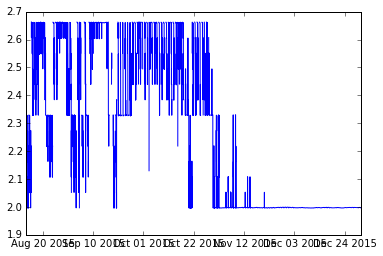

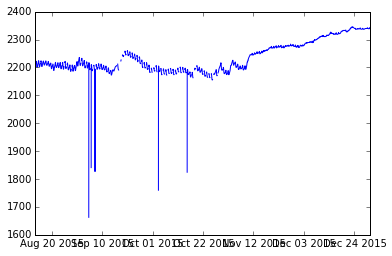

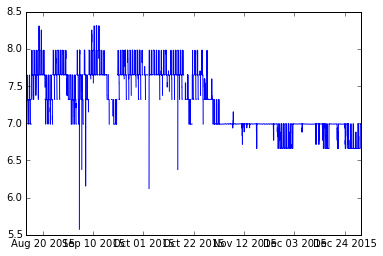

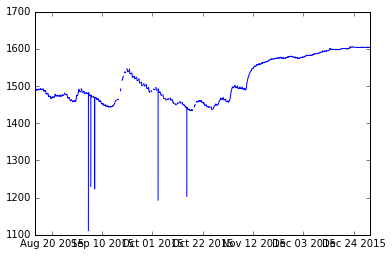

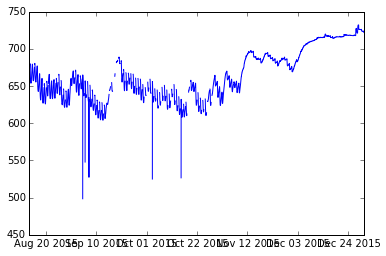

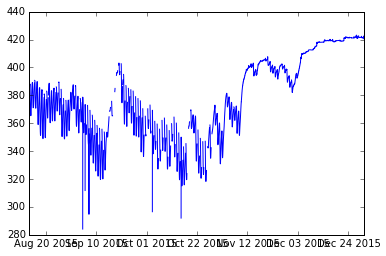

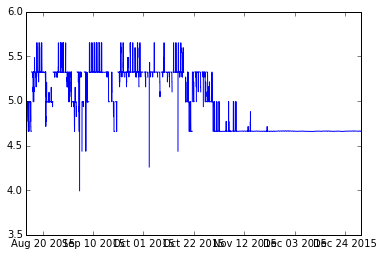

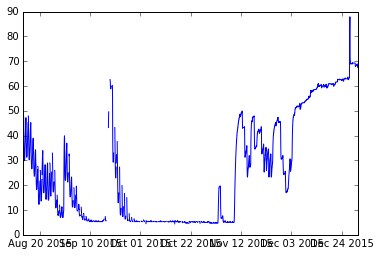

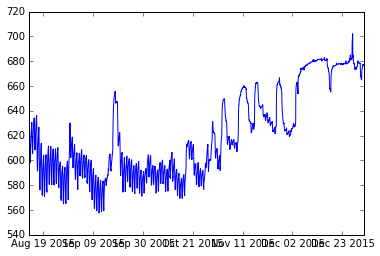

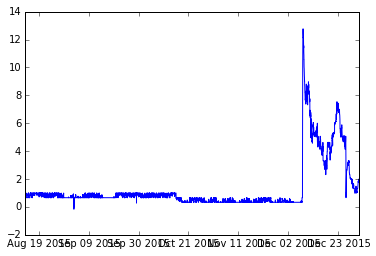

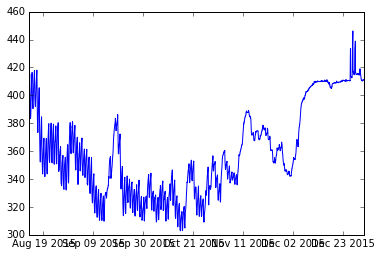

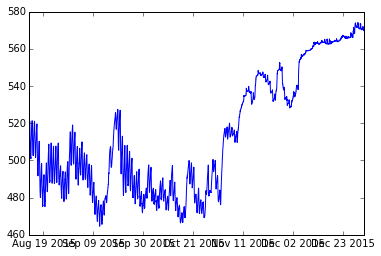

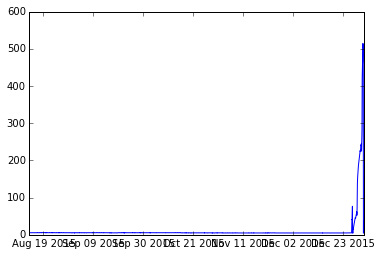

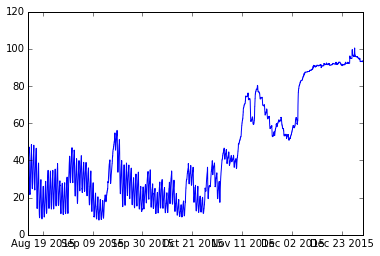

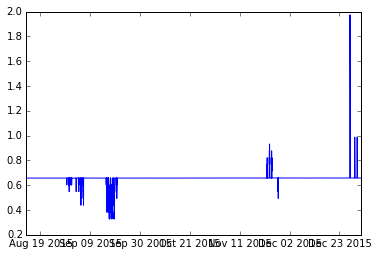

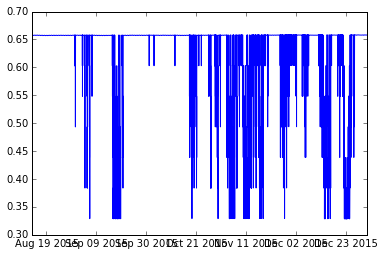

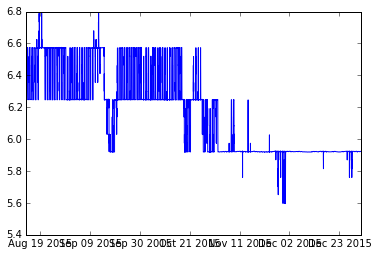

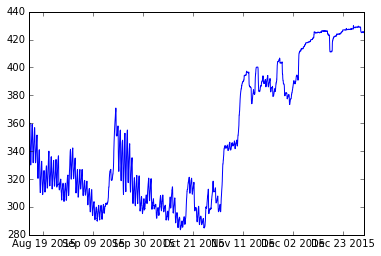

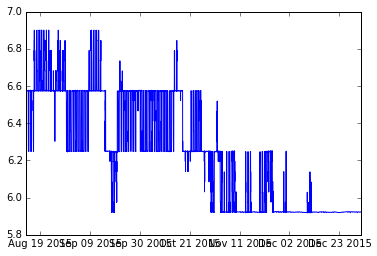

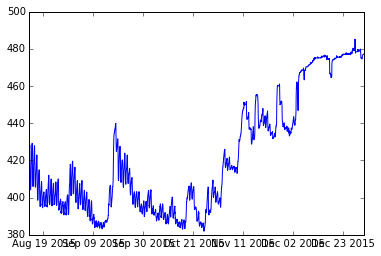

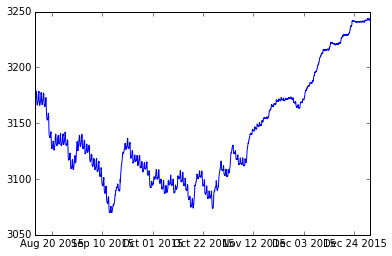

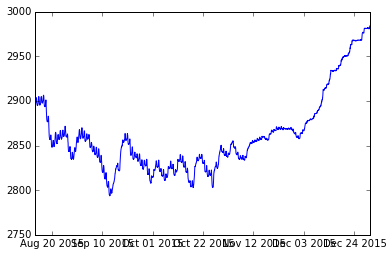

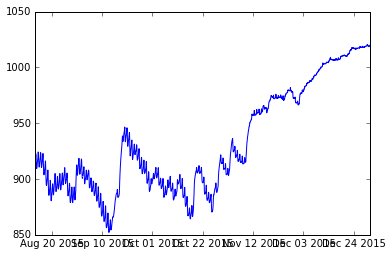

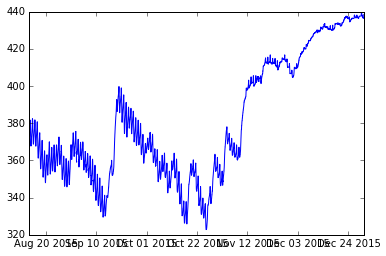

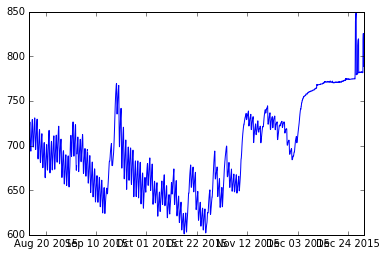

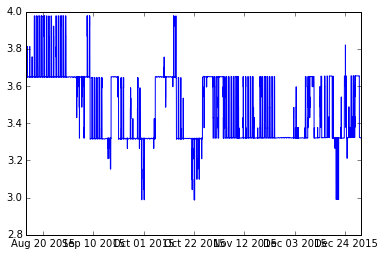

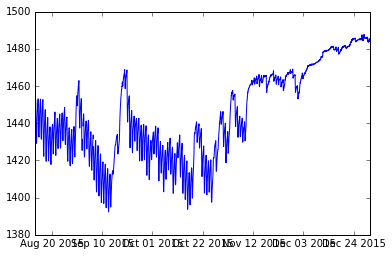

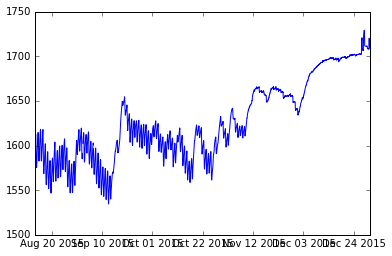

In [15]:
for column in radius:
    if column in metadata.DSID.values:
        plt.figure()
        plt.plot(radius.index, radius[column])
#         plt.ylim( [min(radius[i]),max(radius[i])] )


SyntaxError: invalid syntax (<ipython-input-13-cfc18eb1ba1c>, line 1)